In [94]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from qutip import *



In [168]:
N1 = 4
N2 = 4

In [ ]:
class quadrature_operator:
    def __init__(self, n):
        self.n = n

        a = destroy(n)
        adag = a.dag()

        self.x = (a + adag)*1/np.sqrt(2)
        self.p = 1j * (adag - a)*1/np.sqrt(2)

class operator:
    def __init__(self,n):
        self.n = n

        a = destroy(self.n)
        adag = a.dag()

        self.a = a
        self.adag = adag

    def squeezing_operator(self,phi,z):

        exponent =  ((-phi*1j*self.a**2).expm()) - (phi*1j*self.adag**2).expm()
        self.squeezing_operator = ( np.log(z)/2 * exponent ).expm()

        return self.squeezing_operator

    def rotation_operator(self,phi):
        self.rotation_operator = (1j * phi * self.adag * self.a).expm()
        return self.rotation_operator

    def beamsplitter_operator(self,theta, N1, N2):

        self.theta = theta
        self.N1 = N1
        self.N2 = N2

        a1 = destroy(N1)
        a2 = destroy(N2)

        x1 = (a1 + a1.dag())/np.sqrt(2)
        p1 = (a1 - a1.dag())/(1j*np.sqrt(2))
        x2 = (a2 + a2.dag())/np.sqrt(2)
        p2 = (a2 - a2.dag())/(1j*np.sqrt(2))

        bs = ((p1 * x2 - p2 * x1) * 1j * theta ).expm()

        return bs
    
    def displacement_operator_x(self,s, p):
        self.s = s
        self.p = p

        self.displacement_operator = (- 1j * s * p).expm()
        return self.displacement_operator
    
    def vacuum_state(self):
        vacuum = basis(self.n,0)

        return vacuum

    
class transformation:
    def __init__(self, operator, quadrature):

        self.operator = operator
        self.quadrature = quadrature
        self.transformation = operator.dag() * quadrature * operator 


In [ ]:
op = operator(n=N1)

delta_x = 0.1
delta_p = delta_x

mu = 2

x = np.linspace(-5, 5, 100)
p = np.linspace(-5, 5, 100)

x2 = np.linspace(-5, 5, 100)

j = 1

$ \ket{j, \Delta_x, \Delta_p} = \sum_n{ e^{-\frac{1}{2}\cdot \Delta_p^2((2n + j)\sqrt{\pi\hbar})^2}\hat{X}}(2n + j)\sqrt{\pi\hbar}\ket{\Delta_x}$

$\ket{\Delta_x}=\hat{S}(\Delta_x^{-1})\ket{0}$

In [209]:
#vacuum = op.vacuum_state()


#squeezing = op.squeezing_operator(phi = 0, z=1/delta_x)
#displacement = op.displacement_operator_x(s=0, p=p)

## CAT STATES

In [397]:
N = 60
psi = coherent(N,alpha=1) - coherent(N,alpha=-1)

sq = squeeze(N, z = 0.5)

psi_sq = (sq * psi).unit()


In [398]:

W_3 = wigner(psi_sq, x, p)

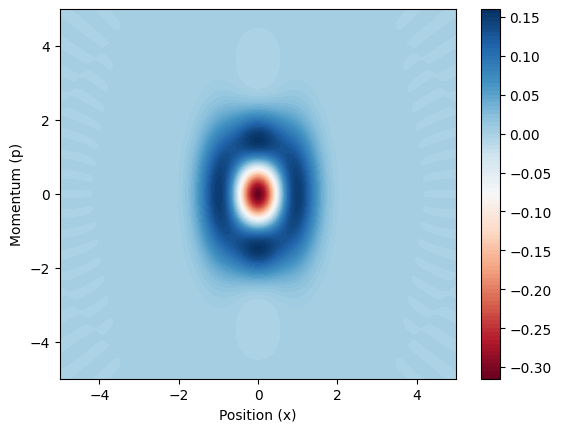

In [399]:
import matplotlib.pyplot as plt
plt.contourf(x, p, W_3, levels=100, cmap='RdBu')
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.colorbar()
plt.show()

## GKP STATES

In [424]:
N = 150
delta_x = 0.1
delta_p = delta_x
n = np.linspace(-N/2, N/2, N)
j = 1



sq_operator = squeeze(N, z = 1/delta_x)


vacuum = basis(N,0)

#first apply squeeze
psi_0 = sq_operator(vacuum)
psi_1 = 0

for i in range(len(n)):
    dis_operator = displace(N, alpha = (2*n[i]+j)*np.sqrt(np.pi))
    exponent = -0.5 * delta_p**2 * ( (2*n[i]+j) * np.sqrt(2)) **2
    psi_1 += dis_operator(psi_0)*np.exp(exponent)



In [425]:
W_GKP = wigner(psi_1, x, p)

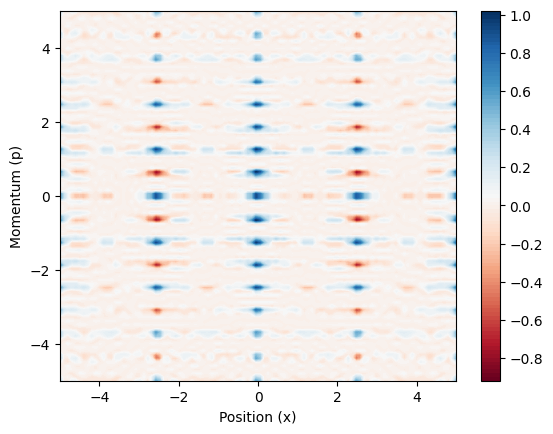

In [426]:
plt.contourf(x, p, W_GKP, levels=100, cmap='RdBu')
plt.xlabel("Position (x)")
plt.ylabel("Momentum (p)")
plt.colorbar()
plt.show()